In [99]:
# importamos las librerias que se van a necesitar

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

from matplotlib import pyplot
from pandas import DataFrame


print(tf.__version__)

# ----------------------------------------------------------------
# definimos una funcion para dibujar los datos
def miplot(X, y):
    df = DataFrame(dict(x1=X[:, 0], x2=X[:, 1], label=y))
    colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'black'}
    fig, ax = pyplot.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
    pyplot.show()

2.16.1


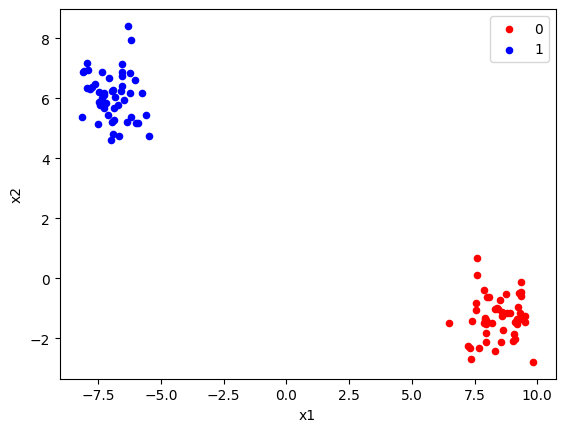

In [10]:
X, y = make_blobs(centers=2, cluster_std=0.8)
miplot(X,y)

In [11]:
# podemos visualizar el contenido de X solo escribiendo su nombre y ejecutandolo
# fijate que son coordenadas con x1 y x2
X

array([[ 8.7824614 , -1.13725875],
       [ 9.19017307, -1.52729644],
       [-8.08529785,  6.87649019],
       [ 9.07459186, -1.85225894],
       [ 7.87032264, -1.48771835],
       [-7.17567692,  5.84442539],
       [ 8.01275268, -1.45208947],
       [ 9.34178997, -0.60041474],
       [ 7.93869333, -1.81203887],
       [ 9.49925815, -1.45836078],
       [-6.21833746,  6.84525573],
       [-6.02858522,  6.62991115],
       [-6.94156418,  5.22159621],
       [-5.57537531,  5.45069542],
       [ 7.55051966, -1.06836699],
       [-7.61162649,  6.49297991],
       [ 9.34120326, -0.12661113],
       [-7.50112279,  5.15344523],
       [-6.82508904,  6.06395067],
       [-6.48741971,  5.94737678],
       [-6.5623175 ,  6.40600572],
       [ 8.62483973, -1.72087929],
       [ 6.47833618, -1.47435692],
       [ 7.23036547, -2.25000448],
       [-7.27390675,  5.68845959],
       [ 9.36154291, -1.34739565],
       [ 8.18212557, -1.47179909],
       [ 7.9337657 , -1.39432382],
       [ 7.54658438,

In [12]:
# lo mismo con y
# fijate que son valores de 0 y 1 (grupo rojo y azul)
y

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [13]:
model = Sequential()  # se define red

model.add(Dense(1, activation='sigmoid', input_dim=2))  # creamos la primera capa oculta, esta tiene como entrada dos variables (input_dim=2)
                                                        # la función de activacion es una sigmoide (activation='sigmoid')
                                                        # tiene una única neurona (1)

model.add(Dense(1, activation='sigmoid'))     # creamos la capa de salida, una sigmoide
                                              # al ser una clasificacion binaria la capa de salida siempre tiene solo 1 neurona

model.summary()  # nos hace un resumen del modelo, interesante el recuento de parametros

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # contruye la red que hemos definido
      # estos parametros no los toques por ahora, ya los veremos mas adelante
      # basicamente estamos definiendo la función de coste y el tipo de optimizador

C:\Users\Álvaro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(X, y, epochs=150)  # se ejecuta el proceso de aprendizaje, 100 interaciones (epochs)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5250 - loss: 0.6452  
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4854 - loss: 0.6477 
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5125 - loss: 0.6417 
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5063 - loss: 0.6405 
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5156 - loss: 0.6307 
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5188 - loss: 0.6259 
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4844 - loss: 0.6388 
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4802 - loss: 0.6153 
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.6233 
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5010 - loss: 0.6087 
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5208 - loss: 0.6169 
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5146 - lo

In [15]:
test_loss, test_acc = model.evaluate(X, y)  # se evalua la precision de la red

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.4070 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


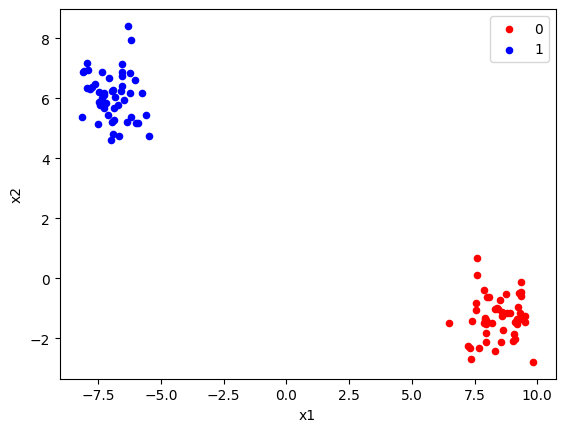

In [16]:
# guardamos en una variable llamada yp las predicciones hechas por la red con model.predict

yp = (model.predict(X) > 0.5).astype("int32")
miplot(X,yp.flatten())  # dibujamos esas predicciones

A continuación, podemos realizar el mismo procedimiento adaptado a nuestros datos. En el siguiente ejemplo circulares

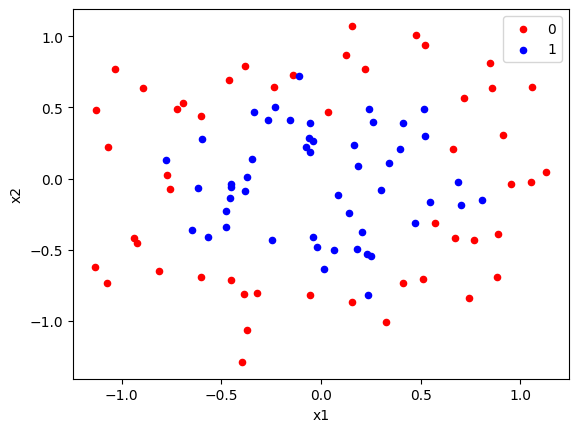

In [46]:
X,y = make_circles(noise=0.2, factor=0.5, random_state=1)
miplot(X,y)

In [105]:
model = Sequential()  # se define red

model.add(Input(shape=(2,)))
model.add(Dense(10, activation='relu'))  #En este caso complejizamos nuestra red 
model.add(Dense(10, activation='relu'))  
model.add(Dense(10, activation='relu'))


model.add(Dense(1, activation='sigmoid'))    

model.summary()  

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_111 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.fit(X, y, epochs=500) #aumentamos las épocas para unos mejores resultados

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9355 - loss: 0.2467 
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9355 - loss: 0.2221 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9170 - loss: 0.2514 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9201 - loss: 0.2360 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9201 - loss: 0.2365 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9170 - loss: 0.2346 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9107 - loss: 0.2273 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9222 - loss: 0.2584 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9045 - loss: 0.2370 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9326 - loss: 0.2146 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9170 - loss: 0.2379 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9076 - los

In [76]:
test_loss, test_acc = model.evaluate(X, y)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9137 - loss: 0.1727 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


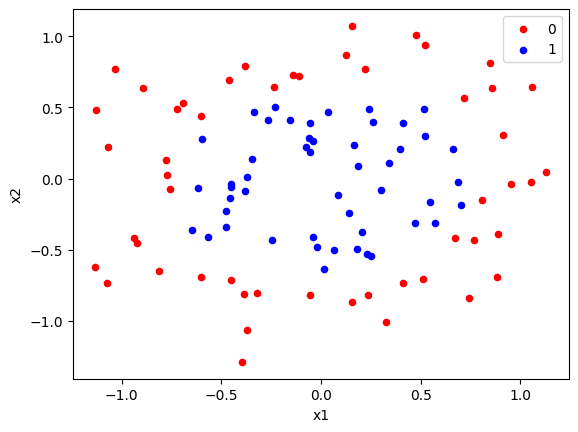

In [77]:
# guardamos en una variable llamada yp las predicciones hechas por la red con model.predict
yp = (model.predict(X) > 0.5).astype("int32")
miplot(X,yp.flatten())

Por último, el siguiente ejemplo con espirales:

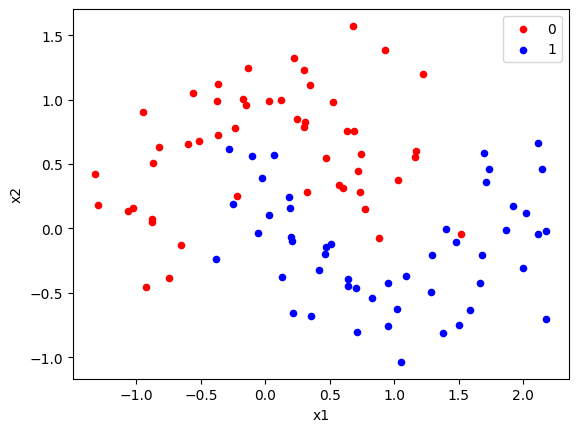

In [106]:
X,y = make_moons(noise=0.3, random_state=0)
miplot(X,y)

X = np.concatenate((X,np.sin(X)), axis=1) 

In [112]:
model = Sequential()  # se define red

model.add(Input(shape=(4,))) 
model.add(Dense(12, activation='relu'))  #En este caso complejizamos nuestra red 
model.add(Dense(12, activation='relu'))  
model.add(Dense(12, activation='relu')) 



model.add(Dense(1, activation='sigmoid'))    

model.summary()  

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_124 (Dense)               │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
model.fit(X, y, epochs=150)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6555 - loss: 0.6784  
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7778 - loss: 0.6728 
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7787 - loss: 0.6678 
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8332 - loss: 0.6605 
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8306 - loss: 0.6564 
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.6516 
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8583 - loss: 0.6420 
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8855 - loss: 0.6324 
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8824 - loss: 0.6268 
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8742 - loss: 0.6181 
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8556 - loss: 0.6123 
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8619 - lo

In [114]:
test_loss, test_acc = model.evaluate(X, y)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9170 - loss: 0.1910  


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


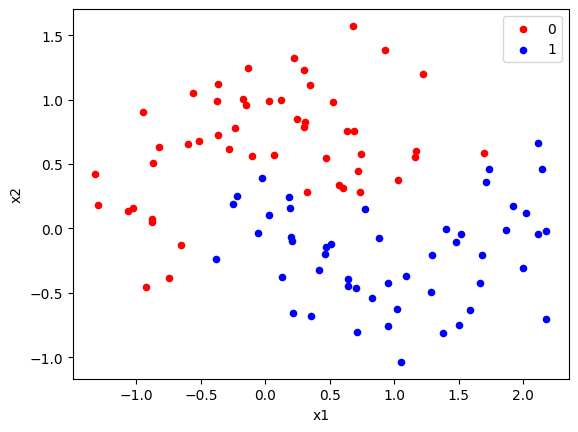

In [115]:
# guardamos en una variable llamada yp las predicciones hechas por la red con model.predict
yp = (model.predict(X) > 0.5).astype("int32")
miplot(X,yp.flatten())